#######################################################################################################################################
### Fichier : BDD_des_accidents_corporel_de_2015_à_2020.ipynb
#######################################################################################################################################

Ce fichier contient les données des accidents corporels de 2015 à 2020. Il se base sur 6 fichiers csv qui sont les suivants : ***2015.csv, 2016.csv, 2017.csv, 2018.csv, 2019.csv, 2020.csv.***

In [662]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 10)

In [663]:
# fpour lire les fichiers de 2015 à 2020
# et les concaténer dans un seul dataframe
from operator import ne

for i in range(2015, 2021):
  if i == 2015:
    df = pd.read_csv(f"./data/{i}.csv", sep=";")
  else:
    df = pd.concat([df, pd.read_csv(f"./data/{i}.csv", sep=";")])

new_df = df.loc[:, ['Année', 'Lieu Admin Actuel - Territoire Nom', 'Type Accident - Libellé', 'Catégorie véhicule', 'Age véhicule']]
# fusionner les lignes Moto lourde, légère et Cyclo  dans moto, 
# et les lignes indeterminable et non renseigné dans autre
new_df['Catégorie véhicule'] = new_df['Catégorie véhicule'].replace({'Moto lourde': 'Moto', 'Moto légère': 'Moto', 'Cyclo': 'Moto', 'Indéterminable': 'Autres'})

In [664]:
# obtenir le nombre d'accidents par age de la voiture en utilisant le groupby et le sort_values
accident_par_age_vehicule = (new_df.groupby('Age véhicule')['Age véhicule'].count()).reset_index(name='nombre').sort_values(['nombre'], ascending=False)

# new_df.groupby('Age véhicule').size()
top10_accident_par_age_vehicule = accident_par_age_vehicule.head(10)

Nombre d'accident par âge du véhicule de 2015 à 2020

In [665]:
# accident par age du véhicule par année
accident_par_age_vehicule_par_annee = new_df.groupby(['Année', 'Age véhicule']).size().reset_index(name="Nombre d'accident").sort_values(["Age véhicule"], ascending=True)
# accident par age du véhicule par année en utilisant matplotlib et numpy

Accident par age du véhicule par année de 2015 à 2020

In [666]:
data_0_3 = accident_par_age_vehicule_par_annee[accident_par_age_vehicule_par_annee['Age véhicule'] <= 3]
data_4_10 = accident_par_age_vehicule_par_annee[(accident_par_age_vehicule_par_annee['Age véhicule'] > 3) & (accident_par_age_vehicule_par_annee['Age véhicule'] <= 10)]
data_11_20 = accident_par_age_vehicule_par_annee[(accident_par_age_vehicule_par_annee['Age véhicule'] > 10) & (accident_par_age_vehicule_par_annee['Age véhicule'] <= 20)]

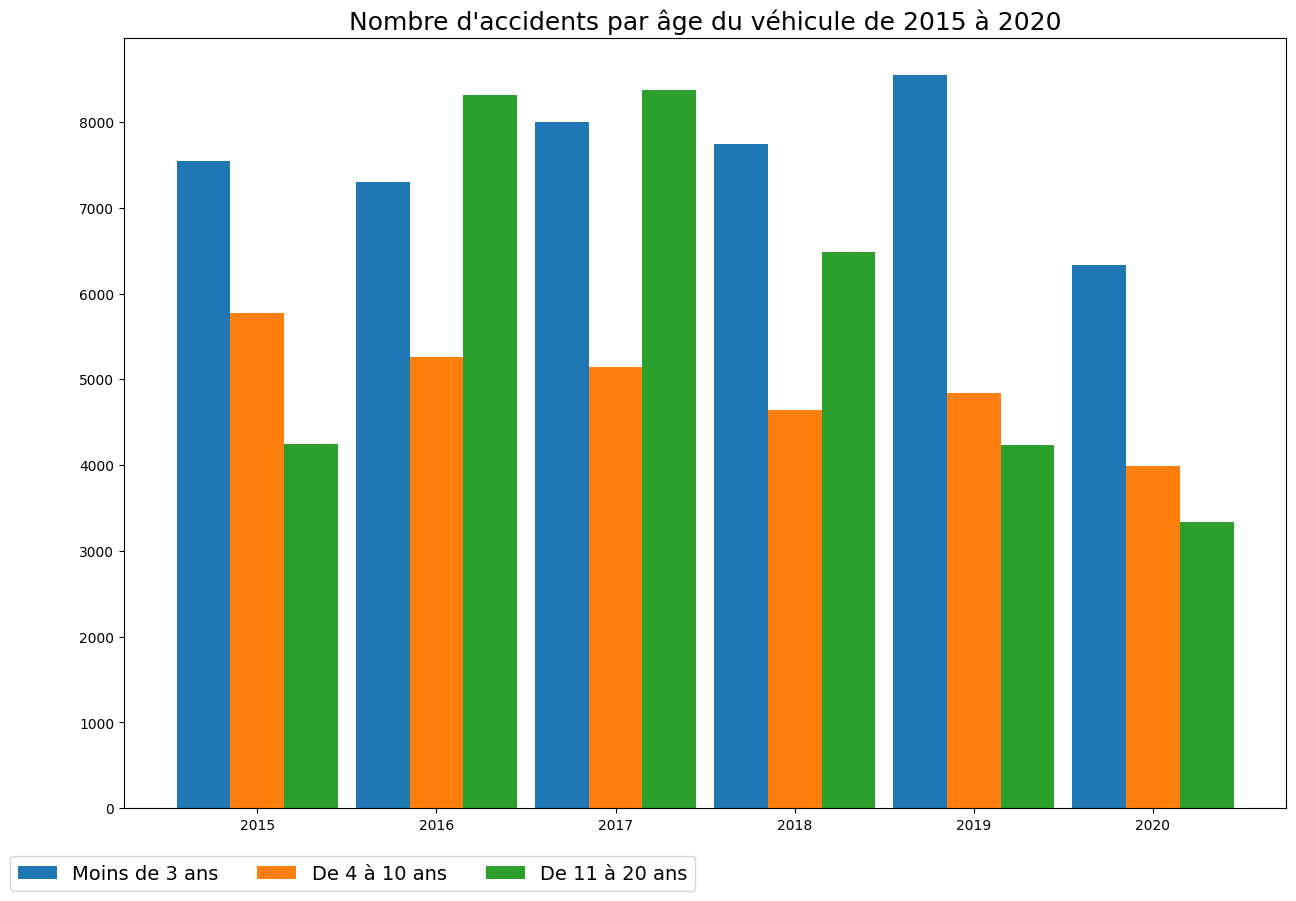

In [667]:
barWidth = 0.3
# creation de la bar Data_0_3
plt.bar(data_0_3['Année']-0.3, data_0_3['Nombre d\'accident'], label='Moins de 3 ans', width=barWidth)
# afficher les valeur des barres sur le graphique pour data_0_3

# creation de la bar Data_4_10
plt.bar(data_4_10['Année'], data_4_10['Nombre d\'accident'], label='De 4 à 10 ans', width=barWidth)
# creation de la bar Data_11_20
plt.bar(data_11_20['Année']+0.3, data_11_20['Nombre d\'accident'], label='De 11 à 20 ans', width=barWidth)

plt.title('Nombre d\'accidents par âge du véhicule de 2015 à 2020', fontsize=18)

# ppour chaque bar on affiche le nombre d'accident
# afficher la légende du graphique à l'extérieur du graphique

plt.legend(fontsize=14, bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.show()

Accident par type de véhicule par année de 2015 à 2020

In [668]:
accident_par_type_vehicule_par_annee = (new_df.groupby(['Année', 'Catégorie véhicule'])['Catégorie véhicule'].count()).reset_index(name="Nombre d'accident").sort_values(['Année'], ascending=False)

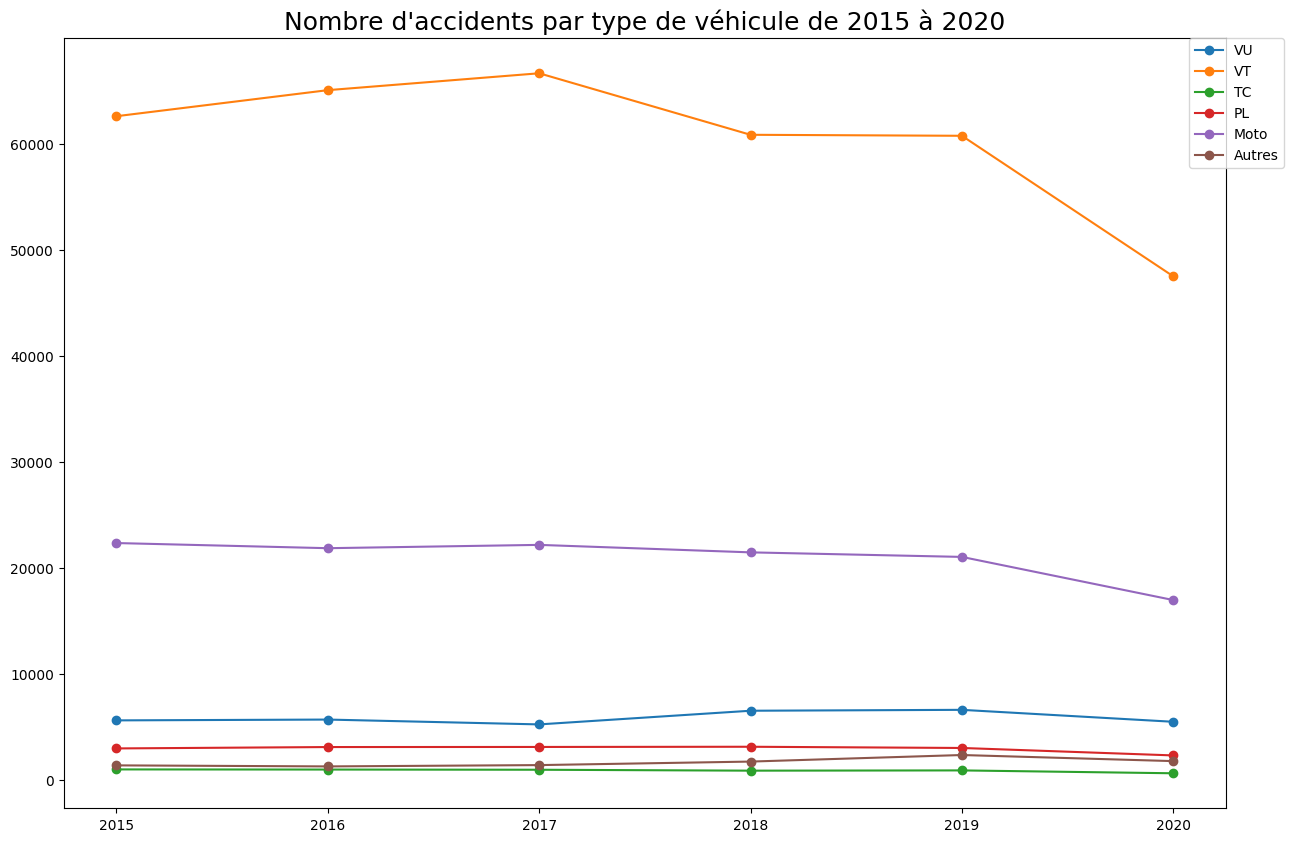

In [669]:
# faire un graphique en ligne pour les accidents par type de véhicule par année
# faire une ligne pour chaque type de véhicule
plt.title('Nombre d\'accidents par type de véhicule de 2015 à 2020', fontsize=18)
for i in accident_par_type_vehicule_par_annee['Catégorie véhicule'].unique():
    df = accident_par_type_vehicule_par_annee[accident_par_type_vehicule_par_annee['Catégorie véhicule'] == i]
    plt.plot(df['Année'], df["Nombre d'accident"], label=i, marker='o')
    # afficher la légende du graphique à l'extérieur du graphique
    plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    # print(i)

Accident par térritoire

In [670]:
accident_par_territoire_par_annee = (new_df.groupby(['Année', 'Lieu Admin Actuel - Territoire Nom'])['Lieu Admin Actuel - Territoire Nom'].count()).reset_index(name="Nombre d'accident").sort_values(['Année'], ascending=False)

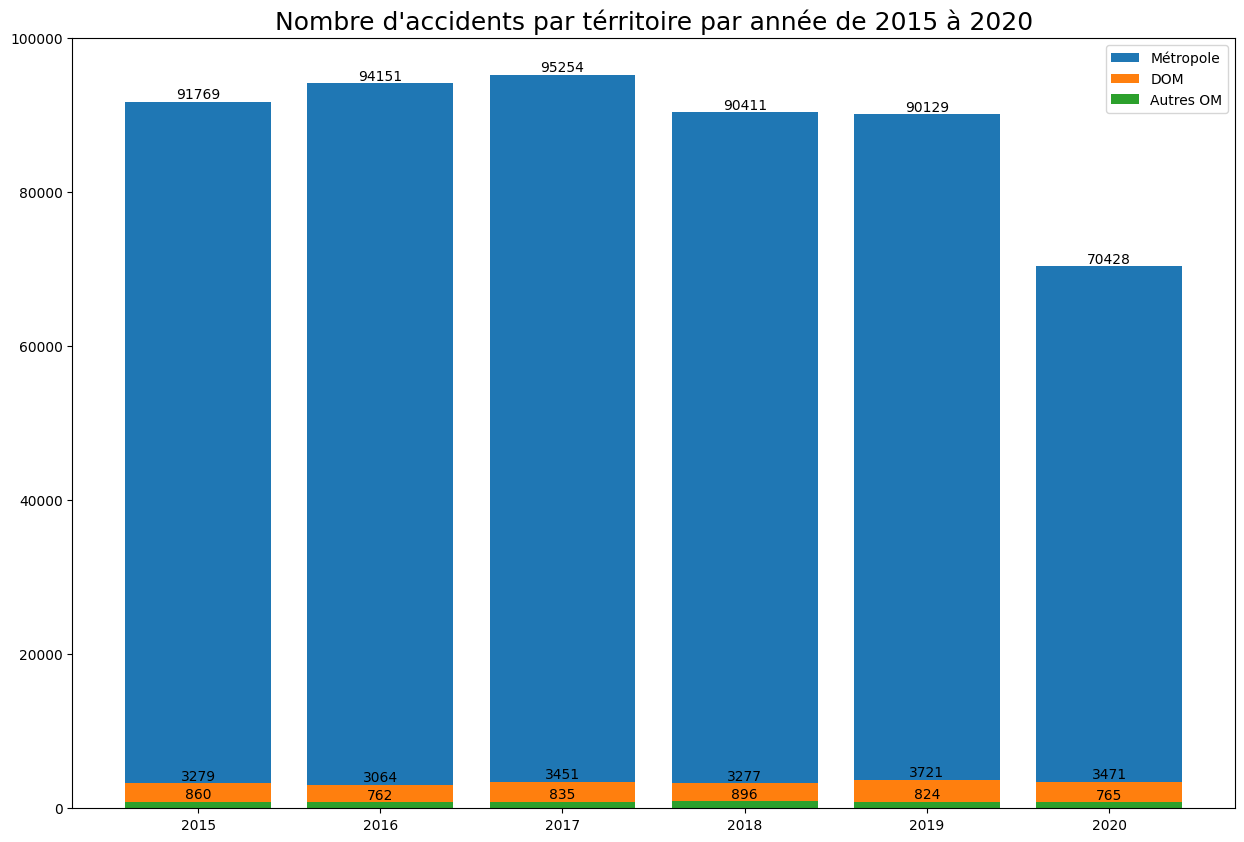

In [671]:
#  Graphe en cammenbert pour les accidents par térritoire par année
# accident_par_territoire = (new_df.groupby('Lieu Admin Actuel - Territoire Nom')['Lieu Admin Actuel - Territoire Nom'].count()).reset_index(name='nombre').sort_values(['nombre'], ascending=False)
# accident_par_territoire


# utiliser matplotlib pour faire un graph en barre pour les accidents par térritoire par année
plt.title('Nombre d\'accidents par térritoire par année de 2015 à 2020', fontsize=18)
for i in accident_par_territoire_par_annee['Lieu Admin Actuel - Territoire Nom'].unique():
    df = accident_par_territoire_par_annee[accident_par_territoire_par_annee['Lieu Admin Actuel - Territoire Nom'] == i]
    # ajouter la valeur de l'axe y sur le graph
    for index, row in df.iterrows():
        plt.text(row['Année'], row['Nombre d\'accident'], row['Nombre d\'accident'], color='black', ha="center", va="bottom")
    plt.bar(df['Année'], df['Nombre d\'accident'], label=i)
    plt.legend()

Accident par type d'accident

In [672]:
# Les accidents par type d'accident par année
accident_par_type_accident_par_annee = (new_df.groupby(['Année', 'Type Accident - Libellé'])['Type Accident - Libellé'].count()).reset_index(name='nombre').sort_values(['Année'], ascending=False)

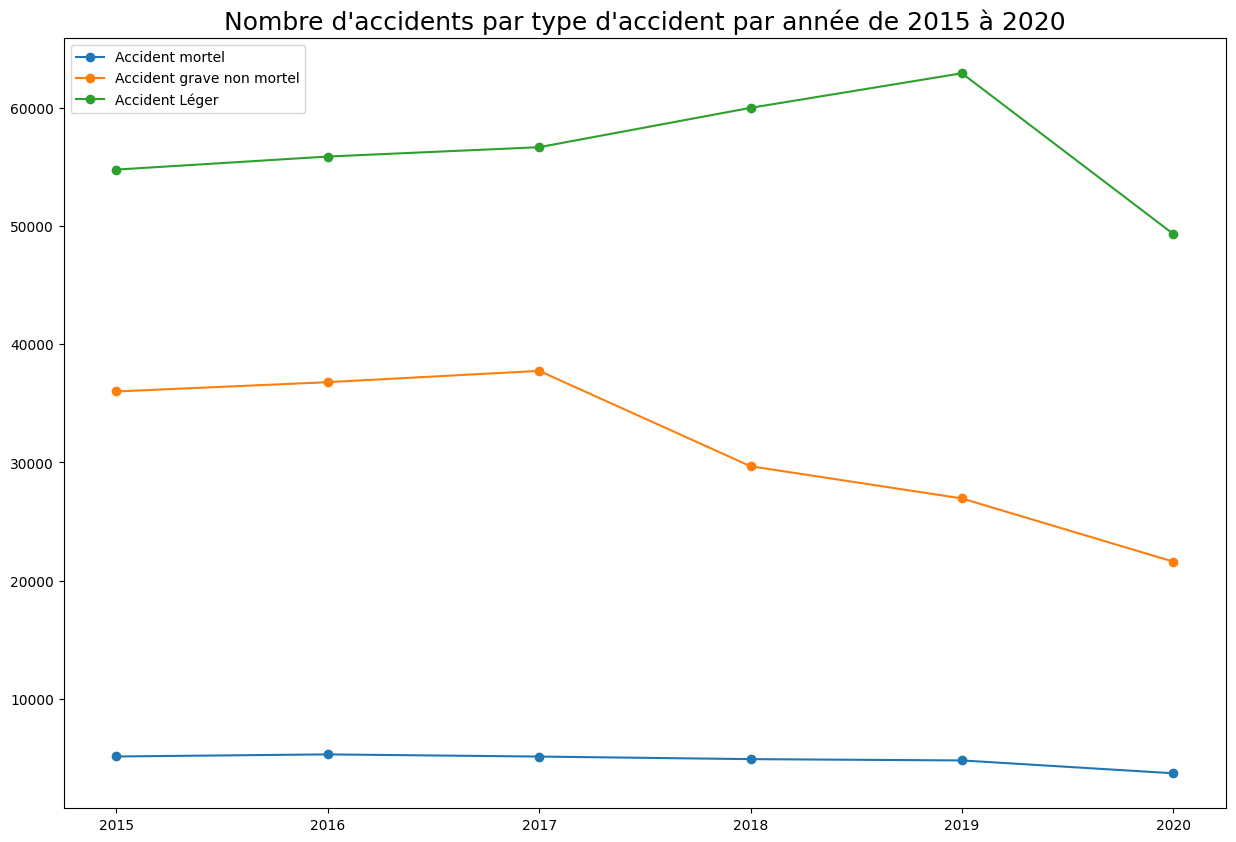

In [673]:
# faire un graphique en ligne pour les accidents par type d'accident par année
# faire une ligne pour chaque type d'accident
# nombre d'accident par type d'accident par année
plt.title('Nombre d\'accidents par type d\'accident par année de 2015 à 2020', fontsize=18)
for i in accident_par_type_accident_par_annee['Type Accident - Libellé'].unique():
    df = accident_par_type_accident_par_annee[accident_par_type_accident_par_annee['Type Accident - Libellé'] == i]
    plt.plot(df['Année'], df['nombre'], label=i, marker='o')
    plt.legend()
    # print(i)

#######################################################################################################################################
### Fichier : charts_cambriolage_violence_vol.ipynb
#######################################################################################################################################

Ce fichier contient les données des cambriolages, des vols et des violences de 2010 à 2018. Il se base sur 1 fichier xlsx qui est le suivant : ***indicateur_victimation_et_insécurité.xlsx***

In [674]:
df = pd.read_excel('data/indicateur_victimation_et_insécurité.xlsx', engine='openpyxl', skiprows=7, nrows=19)

In [675]:
getYears = df[['INDICATEURS/PERIODE', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]]

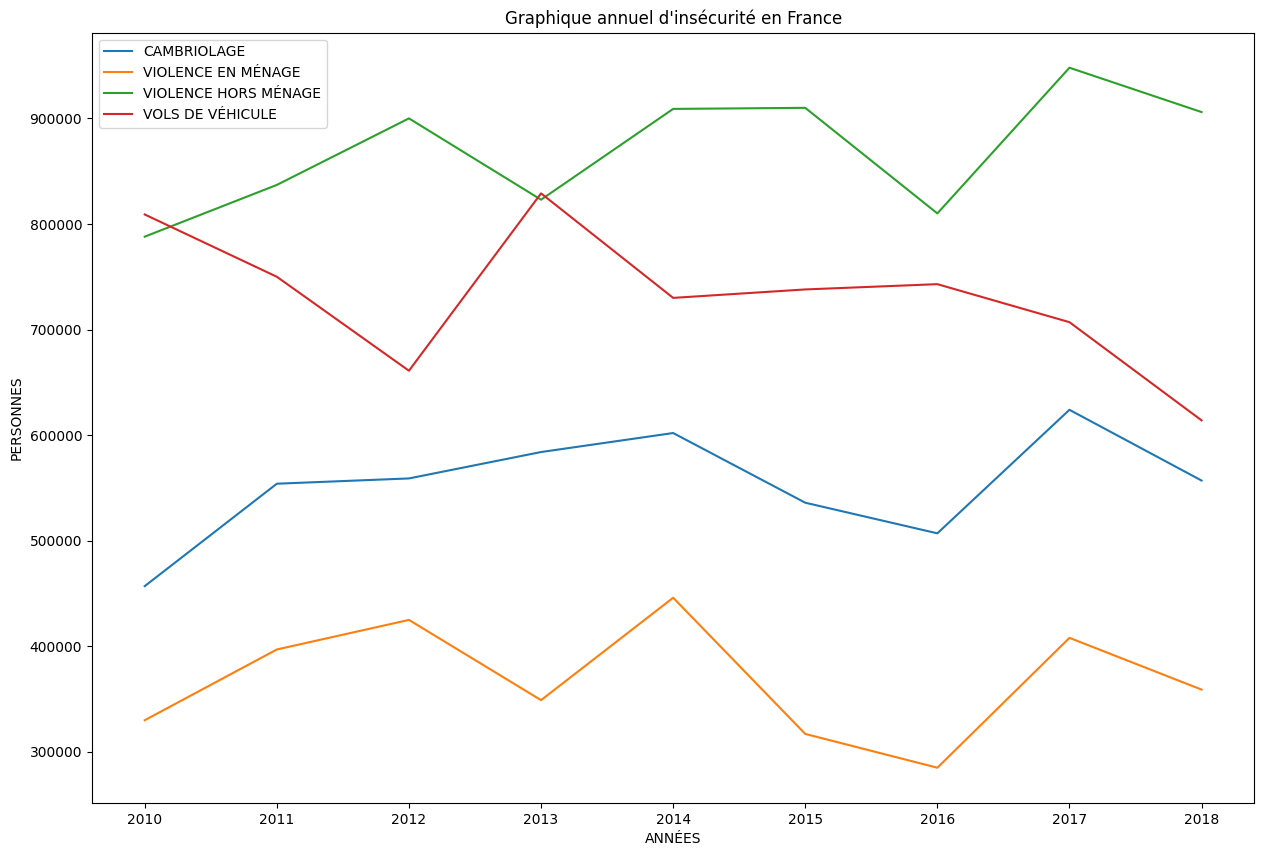

In [676]:
robbery = getYears.iloc[0]
robbery = pd.DataFrame(robbery)
robbery.columns = robbery.iloc[0]
robbery = robbery[1:]



violenceAtHome = getYears.iloc[13]
violenceAtHome = pd.DataFrame(violenceAtHome)
violenceAtHome.columns = violenceAtHome.iloc[0]
violenceAtHome = violenceAtHome[1:]

violenceOutdoor = getYears.loc[[11, 12]]
violenceOutdoor = pd.Series(violenceOutdoor[[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]].sum())


carjacking = getYears.loc[[3, 4, 5]]
carjacking = pd.Series(carjacking[[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]].sum())

plt.plot(robbery)
plt.plot(violenceAtHome)
plt.plot(violenceOutdoor)
plt.plot(carjacking)

plt.title('Évolution des vols et violences en France', fontsize=18)
plt.xlabel('ANNÉES', fontsize=14)
plt.ylabel('VICTIMES', fontsize=14)
plt.legend(["CAMBRIOLAGE", "VIOLENCE EN MÉNAGE", "VIOLENCE HORS MÉNAGE", "VOLS DE VÉHICULE"], bbox_to_anchor=(1,1), fontsize=18)
plt.show()

#######################################################################################################################################
### Fichier : falsification.ipynb
#######################################################################################################################################

Ce fichier contient les données des falsifications de 2015 à 2021. Il se base sur 1 fichier xlsx qui est le suivant : ***crimes_mensuels.xlsx***

In [677]:
# Read the excel file
data_raw = pd.read_excel("data/crimes_mensuels.xlsx", sheet_name="France_Entière")

In [678]:
falsifications_i89i90i91 = data_raw.loc[88:90, '_2021_12':'_2015_01']

# reversing the dataframe
falsifications_i89i90i91 = falsifications_i89i90i91[falsifications_i89i90i91.columns[::-1]]

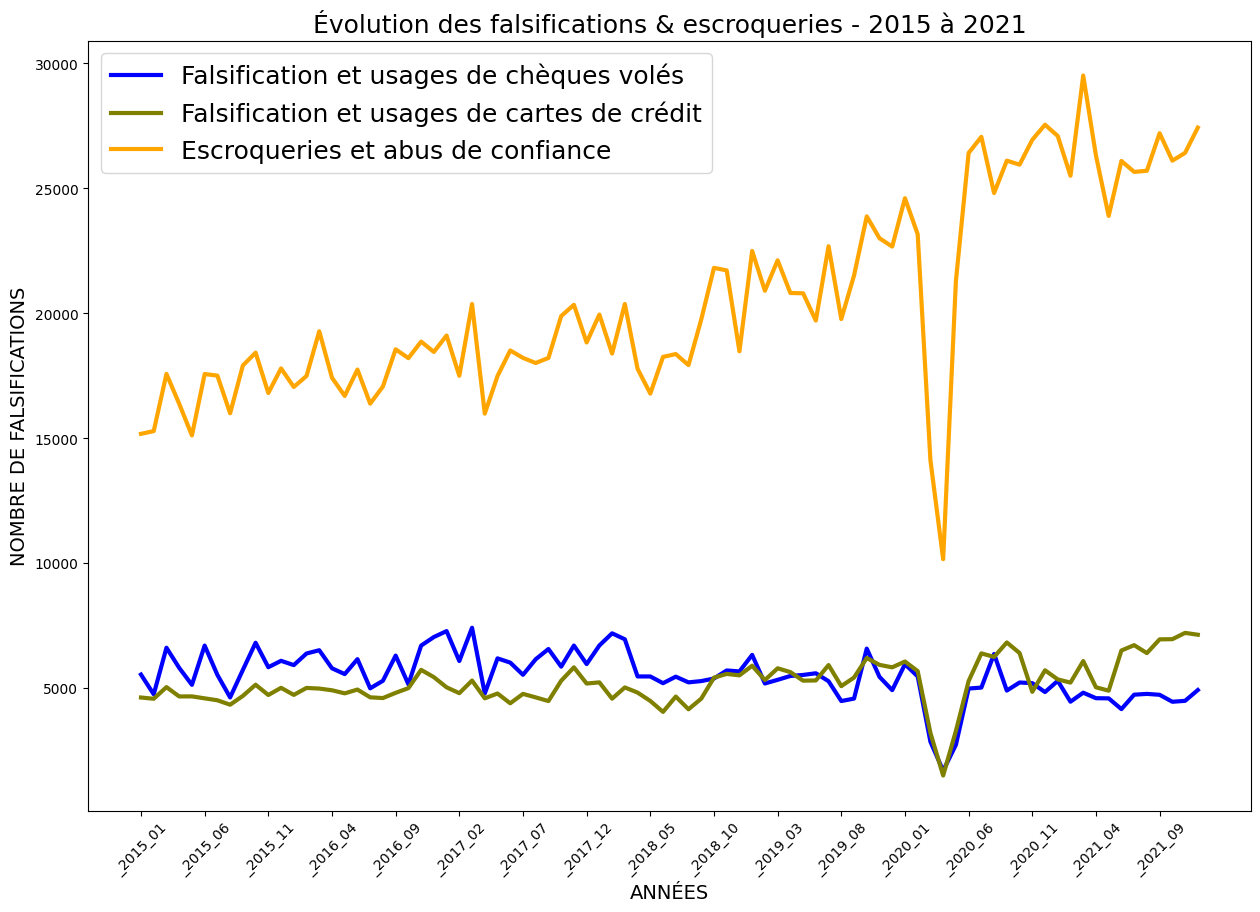

In [679]:
# dataframe for plots
row90 = falsifications_i89i90i91.iloc[2]
row89 = falsifications_i89i90i91.iloc[1]
row88 = falsifications_i89i90i91.iloc[0]

df = pd.DataFrame({
  'period': row88.index,
  'Falsification et usages de chèques volés': row88.values,
  'Falsification et usages de cartes de crédit': row89.values,
  'Escroqueries et abus de confiance': row90.values
})

# multiple line plots
plt.plot( 'period', 'Falsification et usages de chèques volés', data=df, marker='', markerfacecolor='blue', markersize=12, color='blue', linewidth=3)
plt.plot( 'period', 'Falsification et usages de cartes de crédit', data=df, marker='', markersize=12, color='olive', linewidth=3)
plt.plot( 'period', 'Escroqueries et abus de confiance', data=df, marker='', markersize=12, color='orange', linewidth=3)

# title, ticks
plt.title("Évolution des falsifications & escroqueries - 2015 à 2021", fontsize=18)
plt.xticks(np.arange(0, row88.index.size, 5), rotation=45)
plt.ylabel('NOMBRE DE FALSIFICATIONS', fontsize=14)
plt.xlabel('ANNÉES', fontsize=14)

# show legend
plt.legend(fontsize=18)

# show graph
plt.show()

#######################################################################################################################################
### Fichier : faux_documents.ipynb
#######################################################################################################################################

Ce fichier contient les données des faux documents de 2015 à 2021, ainsi que les chiffres concernant les accidents de la route de 2020 avec des automobilistes qui possèdent ou non un permis de conduire. Il se base sur 1 fichier xlsx qui est le suivant : ***crimes_mensuels.xlsx***

In [680]:
df = pd.read_excel('./data/crimes_mensuels.xlsx', 'France_Entière')

In [681]:
df_80_2021 = df.loc[80, '_2021_12' : '_2021_01']
df_80_2020 = df.loc[80, '_2020_12' : '_2020_01']
df_80_2019 = df.loc[80, '_2019_12' : '_2019_01']
df_80_2018 = df.loc[80, '_2018_12' : '_2018_01']
df_80_2017 = df.loc[80, '_2017_12' : '_2017_01']
df_80_2016 = df.loc[80, '_2016_12' : '_2016_01']
df_80_2015 = df.loc[80, '_2015_12' : '_2015_01']

df_81_2021 = df.loc[81, '_2021_12' : '_2021_01']
df_81_2020 = df.loc[81, '_2020_12' : '_2020_01']
df_81_2019 = df.loc[81, '_2019_12' : '_2019_01']
df_81_2018 = df.loc[81, '_2018_12' : '_2018_01']
df_81_2017 = df.loc[81, '_2017_12' : '_2017_01']
df_81_2016 = df.loc[81, '_2016_12' : '_2016_01']
df_81_2015 = df.loc[81, '_2015_12' : '_2015_01']

df_82_2021 = df.loc[82, '_2021_12' : '_2021_01']
df_82_2020 = df.loc[82, '_2020_12' : '_2020_01']
df_82_2019 = df.loc[82, '_2019_12' : '_2019_01']
df_82_2018 = df.loc[82, '_2018_12' : '_2018_01']
df_82_2017 = df.loc[82, '_2017_12' : '_2017_01']
df_82_2016 = df.loc[82, '_2016_12' : '_2016_01']
df_82_2015 = df.loc[82, '_2015_12' : '_2015_01']

In [682]:
dfObj = pd.DataFrame(columns = ['Label', 'Sums_2021', 'Sums_2020', 'Sums_2019', 'Sums_2018', 'Sums_2017', 'Sums_2016', 'Sums_2015'])

In [683]:
dfObj = dfObj.append({
  'Label': 'Faux documents d\'identité', 
  'Sums_2021': df_80_2021.sum(),
  'Sums_2020': df_80_2020.sum(),
  'Sums_2019': df_80_2019.sum(),
  'Sums_2018': df_80_2018.sum(),
  'Sums_2017': df_80_2017.sum(),
  'Sums_2016': df_80_2016.sum(),
  'Sums_2015': df_80_2015.sum(),
}, ignore_index = True)

dfObj = dfObj.append({
  'Label': 'Faux documents de véhicule', 
  'Sums_2021': df_81_2021.sum(),
  'Sums_2020': df_81_2020.sum(),
  'Sums_2019': df_81_2019.sum(),
  'Sums_2018': df_81_2018.sum(),
  'Sums_2017': df_81_2017.sum(),
  'Sums_2016': df_81_2016.sum(),
  'Sums_2015': df_81_2015.sum(),
}, ignore_index = True)

dfObj = dfObj.append({
  'Label': 'Faux documents administratifs', 
  'Sums_2021': df_82_2021.sum(),
  'Sums_2020': df_82_2020.sum(),
  'Sums_2019': df_82_2019.sum(),
  'Sums_2018': df_82_2018.sum(),
  'Sums_2017': df_82_2017.sum(),
  'Sums_2016': df_82_2016.sum(),
  'Sums_2015': df_82_2015.sum(),
}, ignore_index = True)

In [684]:
labels = [2021, 2020, 2019, 2018, 2017, 2016, 2015]
values_80 = [df_80_2021.sum(), df_80_2020.sum(), df_80_2019.sum(), df_80_2018.sum(), df_80_2017.sum(), df_80_2016.sum(), df_80_2015.sum()]
values_81 = [df_81_2021.sum(), df_81_2020.sum(), df_81_2019.sum(), df_81_2018.sum(), df_81_2017.sum(), df_81_2016.sum(), df_81_2015.sum()]
values_82 = [df_82_2021.sum(), df_82_2020.sum(), df_82_2019.sum(), df_82_2018.sum(), df_82_2017.sum(), df_82_2016.sum(), df_82_2015.sum()]
other = dfObj['Label']

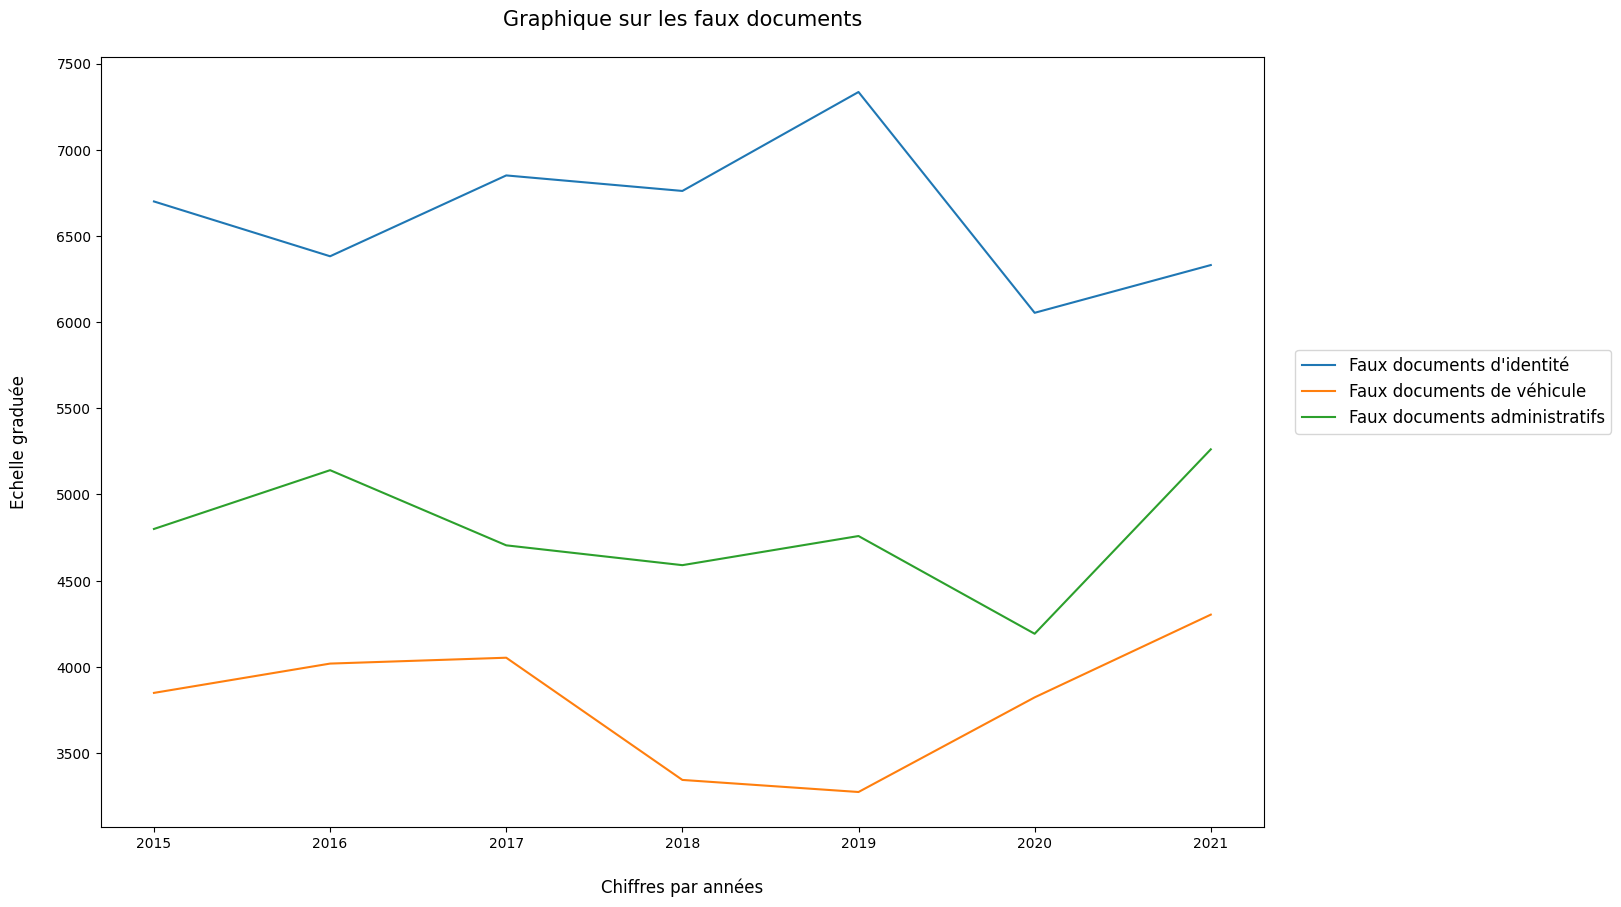

In [685]:
plt.plot(labels, values_80, label = dfObj['Label'][0])
plt.plot(labels, values_81, label = dfObj['Label'][1])
plt.plot(labels, values_82, label = dfObj['Label'][2])

plt.title('Evolution des faux documents', fontsize=18)
plt.xlabel('ANNÉES', fontsize=14)
plt.ylabel('QUANTITÉS', fontsize=14)
plt.legend(fontsize=13)

plt.show()

In [686]:
dfNewObj = pd.DataFrame(columns = ['Label', 'Datas'])

In [687]:
dfNewObj = dfNewObj.append({
  'Label': 'Accident mortel sans permis',
  'Datas': 6
}, ignore_index = True)

dfNewObj = dfNewObj.append({
  'Label': 'Accident non-mortel sans permis',
  'Datas': 4
}, ignore_index = True)

dfNewObj = dfNewObj.append({
  'Label': 'Accident mortel avec permis',
  'Datas': 5
}, ignore_index = True)

dfNewObj = dfNewObj.append({
  'Label': 'Accident non-mortel avec permis',
  'Datas': 85
}, ignore_index = True)

In [688]:
values = dfNewObj['Datas']
colors = ['#E74C3C', '#E67E22', '#9B59B6', '#3498DB']
legends = dfNewObj['Label']

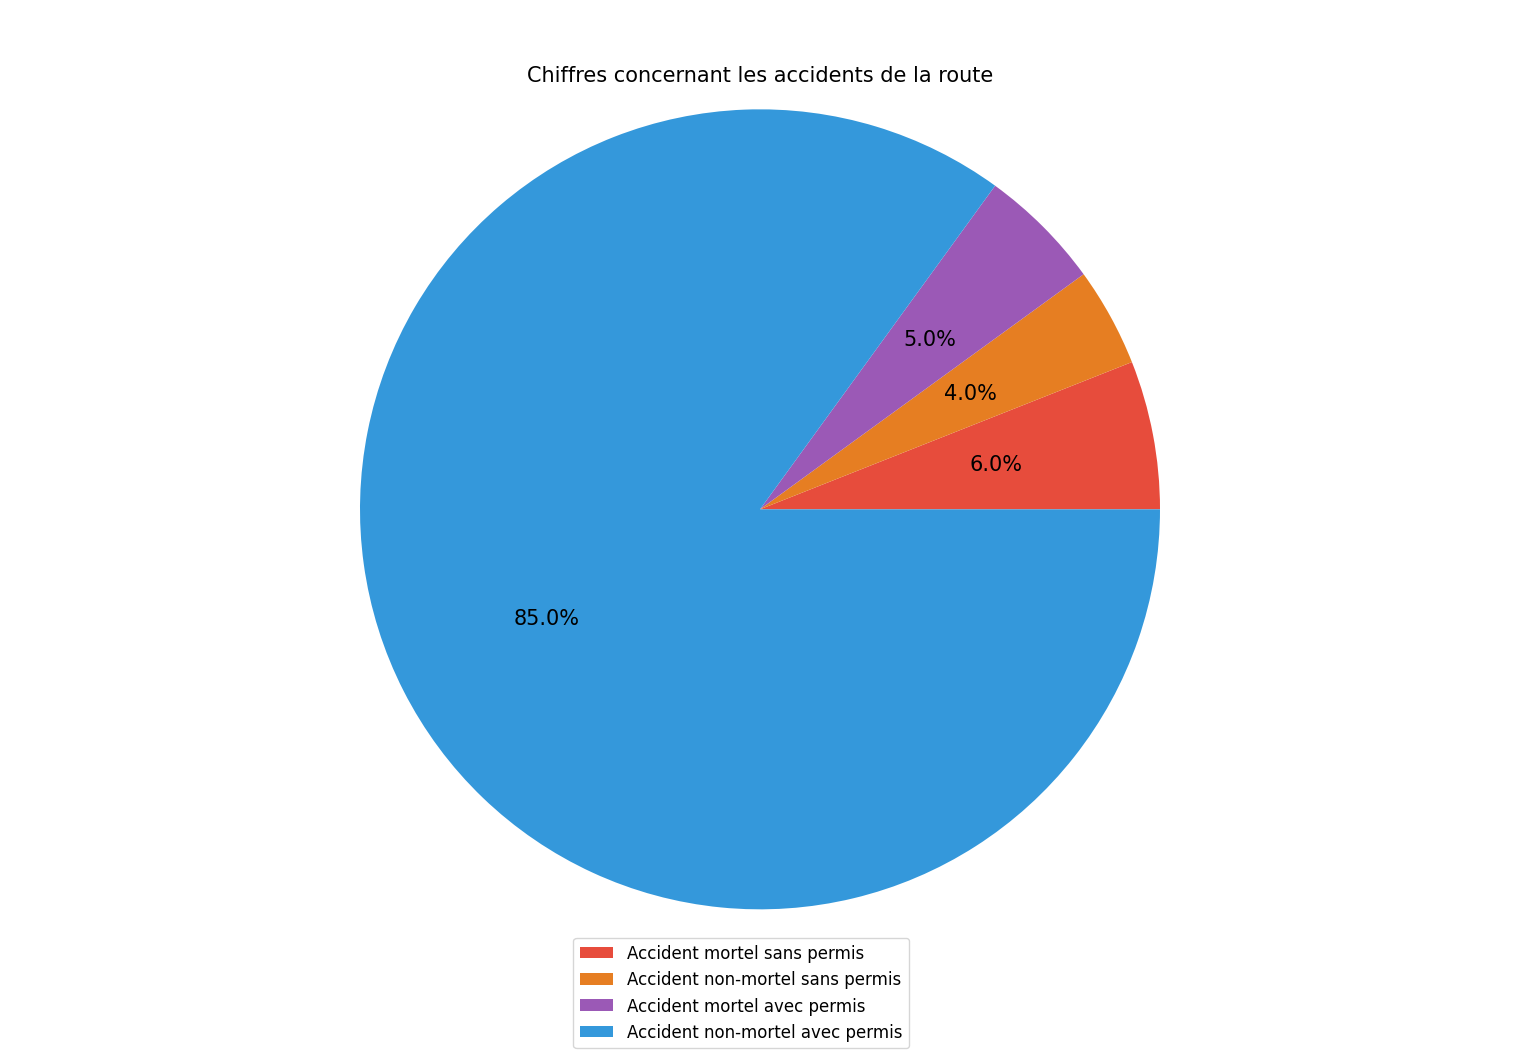

In [689]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')

plt.title('Chiffres concernant les accidents de la route', y = 0.92, fontsize = 15)
plt.pie(values, autopct = '%1.1f%%', colors = colors, textprops = { "fontsize" : 15 })
plt.legend(legends, loc = 'upper left', bbox_to_anchor = (0.37, 0.08), fontsize = 12)

plt.show()

#######################################################################################################################################
### Fichier : homicides.ipynb
#######################################################################################################################################

Ce fichier contient les données des homicides de 2015 à 2021. Il se base sur 1 fichier xlsx qui est le suivant : ***crimes_mensuels.xlsx***

In [690]:
# Read the excel file
homicides_raw = pd.read_excel("data/crimes_mensuels.xlsx", sheet_name="France_Entière")

In [691]:
homicides_i2i3 = homicides_raw.loc[1:2, '_2021_12':'_2015_01']

homicides_i51 = homicides_raw.loc[50:50, '_2021_12':'_2015_01']

homicides_concat = pd.concat([homicides_i2i3, homicides_i51])

# Homicides for the plot
homicides_sum_per_months = homicides_concat.sum(axis=0)

# reversing the dataframe
homicides_sum_per_months = homicides_sum_per_months[::-1]

attempted_homicides_i4i5 = homicides_raw.loc[3:4, '_2021_12':'_2015_01']

# Attempted homicides for the plot
attempted_homicides_sum_per_months = attempted_homicides_i4i5.sum(axis=0)

# reversing the dataframe
attempted_homicides_sum_per_months = attempted_homicides_sum_per_months[::-1]

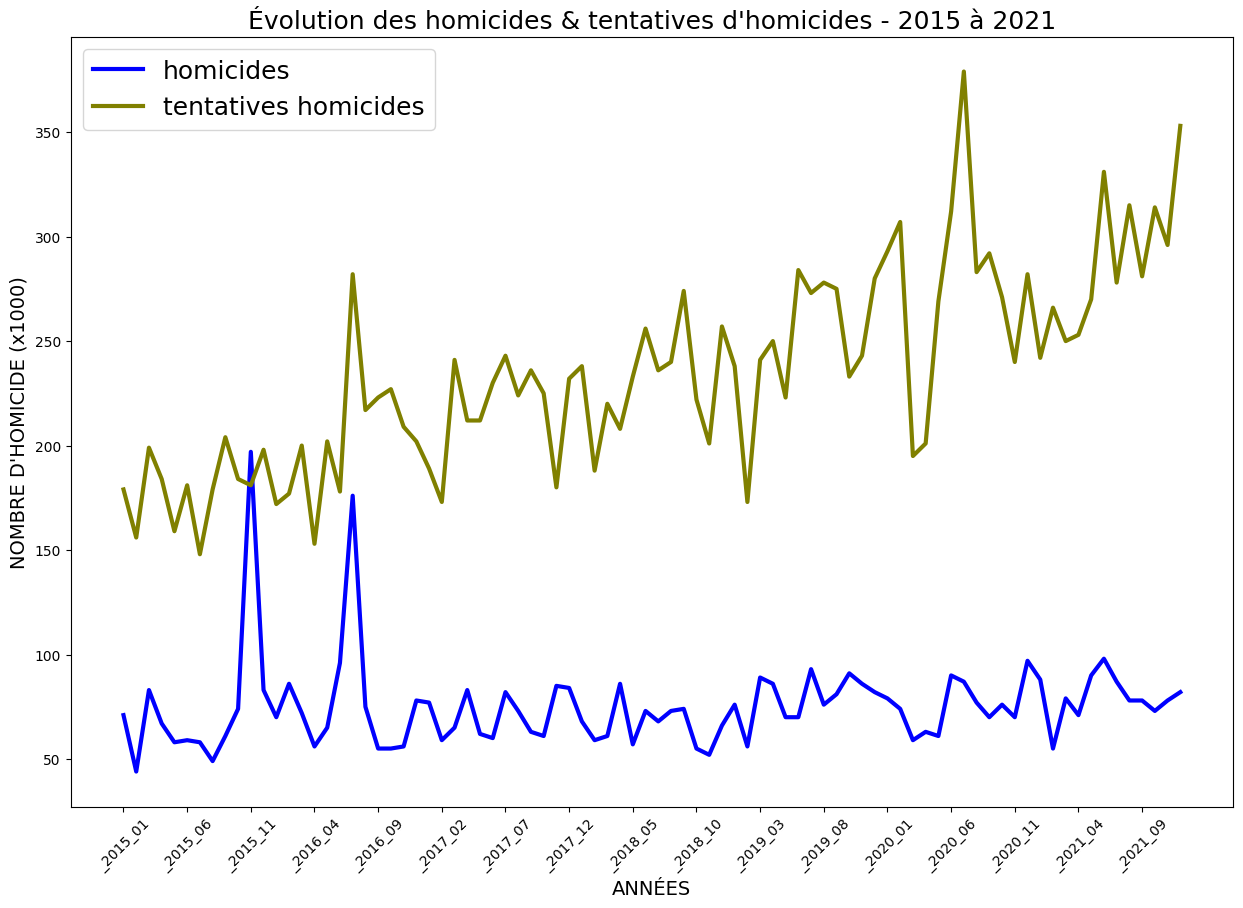

In [692]:
# dataframe for plots
df = pd.DataFrame({
  'period': homicides_sum_per_months.index,
  'homicides': homicides_sum_per_months.values,
  'tentatives homicides': attempted_homicides_sum_per_months.values
})

# multiple line plots
plt.plot( 'period', 'homicides', data=df, marker='', markerfacecolor='blue', markersize=12, color='blue', linewidth=3)
plt.plot( 'period', 'tentatives homicides', data=df, marker='', markersize=12, color='olive', linewidth=3)

# title, ticks
plt.title("Évolution des homicides & tentatives d'homicides - 2015 à 2021", fontsize=18)
plt.xticks(np.arange(0, homicides_sum_per_months.index.size, 5), rotation=45)
plt.ylabel("NOMBRE D'HOMICIDE (x1000)", fontsize=14)
plt.xlabel('ANNÉES', fontsize=14)

# show legend
plt.legend(fontsize=18)

# show graph
plt.show()

#######################################################################################################################################
### Fichier : pauvrete.ipynb
#######################################################################################################################################

Ce fichier contient les données de la pauvreté de 1995 à 2020. Il se base sur 1 fichier xlsx qui est le suivant : ***taux_pauvrete.xlsx***

In [693]:
# Read the excel file
data_raw = pd.read_excel("data/taux_pauvrete.xlsx", sheet_name="ERFS_TPA60_06")

In [694]:
datas_extract = data_raw.iloc[2:11]

# Get columns names
columns = datas_extract.iloc[0].values

# Get rows
rows = datas_extract.iloc[1:10].values

In [695]:
# Create new DataFrame
datas_clean = pd.DataFrame(rows, columns=columns)

datas_clean = datas_clean.drop(columns=['2012 (2)', '2010 (1)'])

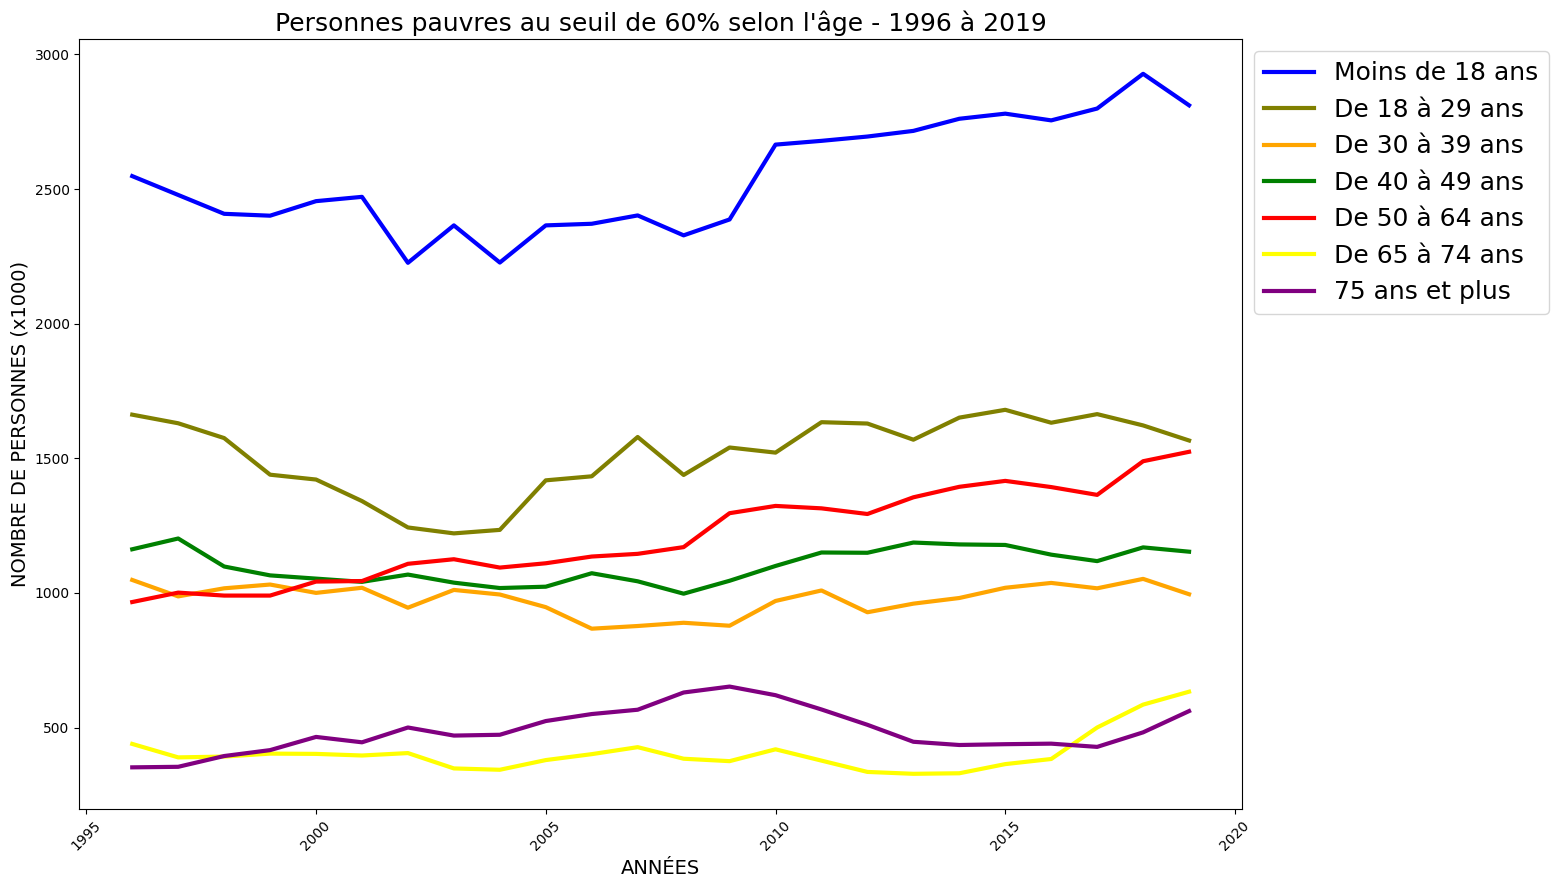

In [696]:
# dataframe for plots
plot1 = datas_clean.loc[0, 1996:2019]
plot2 = datas_clean.loc[1, 1996:2019]
plot3 = datas_clean.loc[2, 1996:2019]
plot4 = datas_clean.loc[3, 1996:2019]
plot5 = datas_clean.loc[4, 1996:2019]
plot6 = datas_clean.loc[5, 1996:2019]
plot7 = datas_clean.loc[6, 1996:2019]

df = pd.DataFrame({
  'Années': plot1.index,
  'Moins de 18 ans': plot1.values,
  'De 18 à 29 ans': plot2.values,
  'De 30 à 39 ans': plot3.values,
  'De 40 à 49 ans': plot4.values,
  'De 50 à 64 ans': plot5.values,
  'De 65 à 74 ans': plot6.values,
  '75 ans et plus': plot7.values,
})

# multiple line plots
plt.plot( 'Années', 'Moins de 18 ans', data=df, marker='', markersize=12, color='blue', linewidth=3)
plt.plot( 'Années', 'De 18 à 29 ans', data=df, marker='', markersize=12, color='olive', linewidth=3)
plt.plot( 'Années', 'De 30 à 39 ans', data=df, marker='', markersize=12, color='orange', linewidth=3)
plt.plot( 'Années', 'De 40 à 49 ans', data=df, marker='', markersize=12, color='green', linewidth=3)
plt.plot( 'Années', 'De 50 à 64 ans', data=df, marker='', markersize=12, color='red', linewidth=3)
plt.plot( 'Années', 'De 65 à 74 ans', data=df, marker='', markersize=12, color='yellow', linewidth=3)
plt.plot( 'Années', '75 ans et plus', data=df, marker='', markersize=12, color='purple', linewidth=3)

# title, ticks, labels
plt.title("Niveau de vie inférieur au seuil de pauvreté 60% - 1996 à 2019", fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('NOMBRE DE PERSONNES (%)', fontsize=14)
plt.xlabel('ANNÉES', fontsize=14)

# show legend
plt.legend(bbox_to_anchor=(1,1), fontsize=18)

# show graph
plt.show()

#######################################################################################################################################
### Fichier : victimisations_des_ménages.ipynb
#######################################################################################################################################

Ce fichier contient les données des victimisations des ménages de 2010 à 2018. Il se base sur 1 fichier xlsx qui est le suivant : ***indicateur_victimation_et_insécurité.xlsx***

In [697]:
df = pd.read_excel('./data/indicateur_victimation_et_insécurité.xlsx', engine='openpyxl', skiprows=7,nrows=19)
getYears = df[['INDICATEURS/PERIODE', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]]

In [698]:
violenceOutdoor = getYears.loc[[11, 12]]
violenceOutdoor = pd.Series(violenceOutdoor[[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]].sum())
violenceOutdoor = pd.DataFrame(violenceOutdoor)

violenceOutdoor.columns=["nombre de victimes de violences physiques/sexuelles hors ménage"]
violenceOutdoor = violenceOutdoor.T
violenceOutdoor = violenceOutdoor.reset_index()
violenceOutdoor =violenceOutdoor.rename({'index': 'INDICATEURS/PERIODE'}, axis=1)

In [699]:
robbery = getYears.iloc[[0,3,4,5,13],:]
robbery = pd.DataFrame(robbery)
robbery = robbery[1:]

df2 =[violenceOutdoor,robbery]
result = pd.concat(df2,sort=True)

In [700]:
firstTiers = result.iloc[:, 0:4]
firstTiers = pd.DataFrame(firstTiers)
firstTiers['Total'] = firstTiers.sum(axis = 1, numeric_only = True)

secondTiers = result.iloc[:, [0,4,5,6]]
secondTiers = pd.DataFrame(secondTiers)
secondTiers['Total'] = secondTiers.sum(axis = 1, numeric_only = True)

lastTiers = result.iloc[:,[0,7,8,9]]
lastTiers = pd.DataFrame(lastTiers)
lastTiers['Total'] = lastTiers.sum(axis = 1, numeric_only = True)

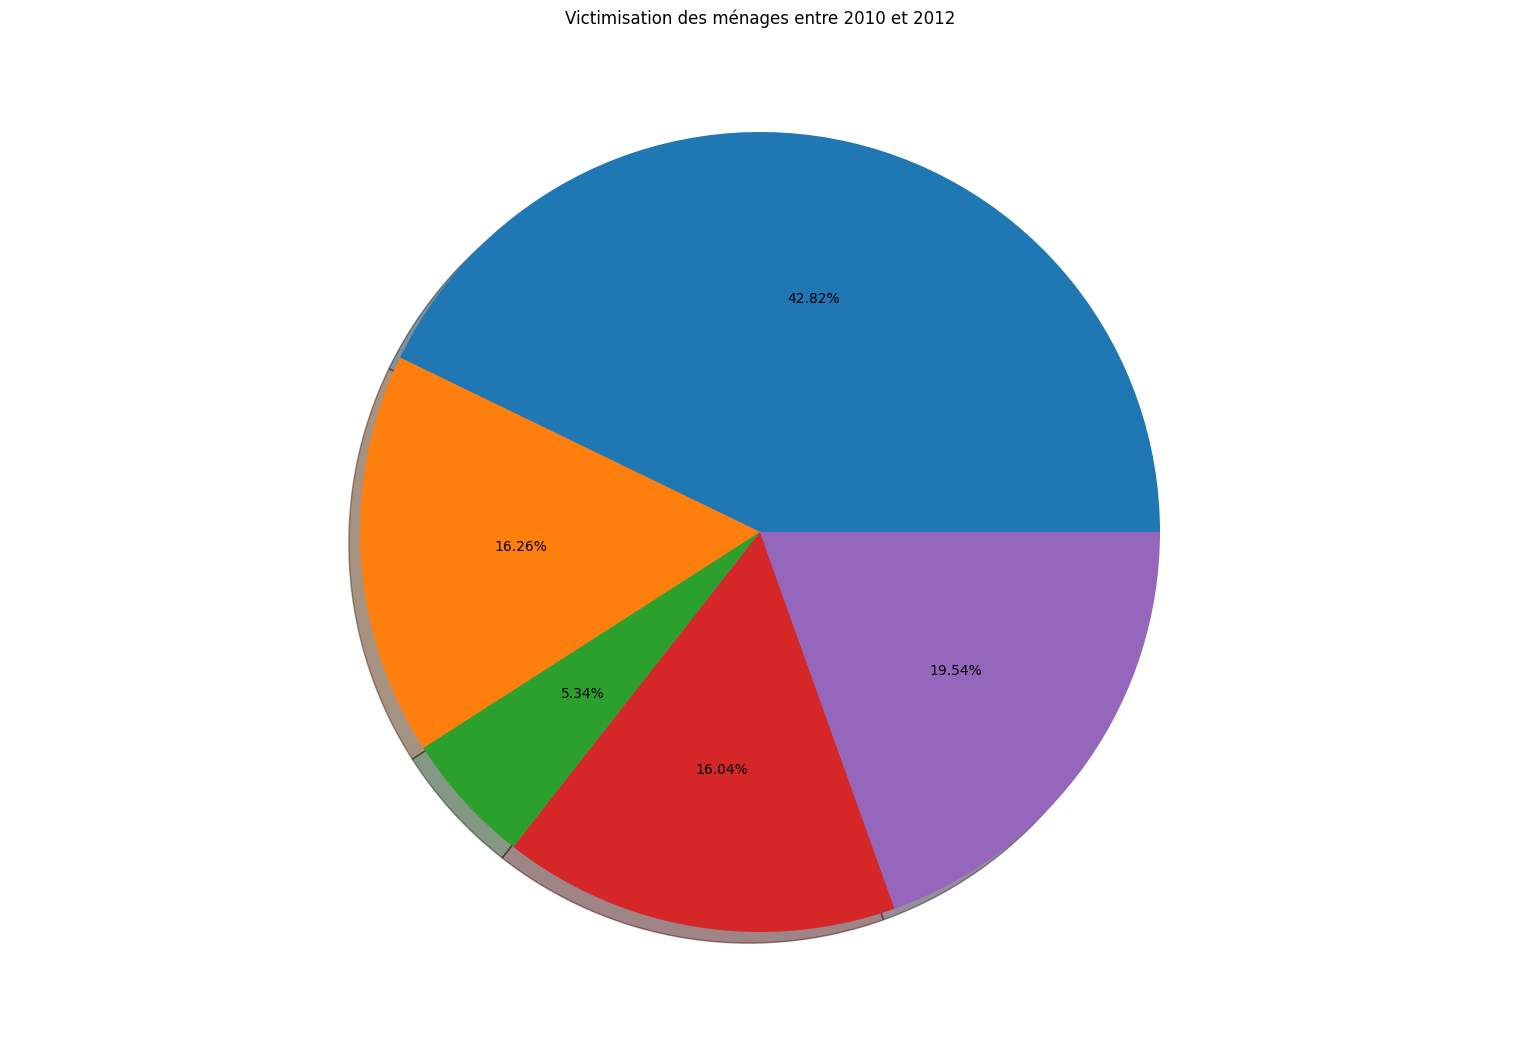

In [701]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
x = firstTiers["INDICATEURS/PERIODE"]
y= firstTiers["Total"]
ax.pie(y,shadow=True, autopct='%1.2f%%')
plt.title("Victimisation des ménages entre 2010 et 2012")
plt.show()

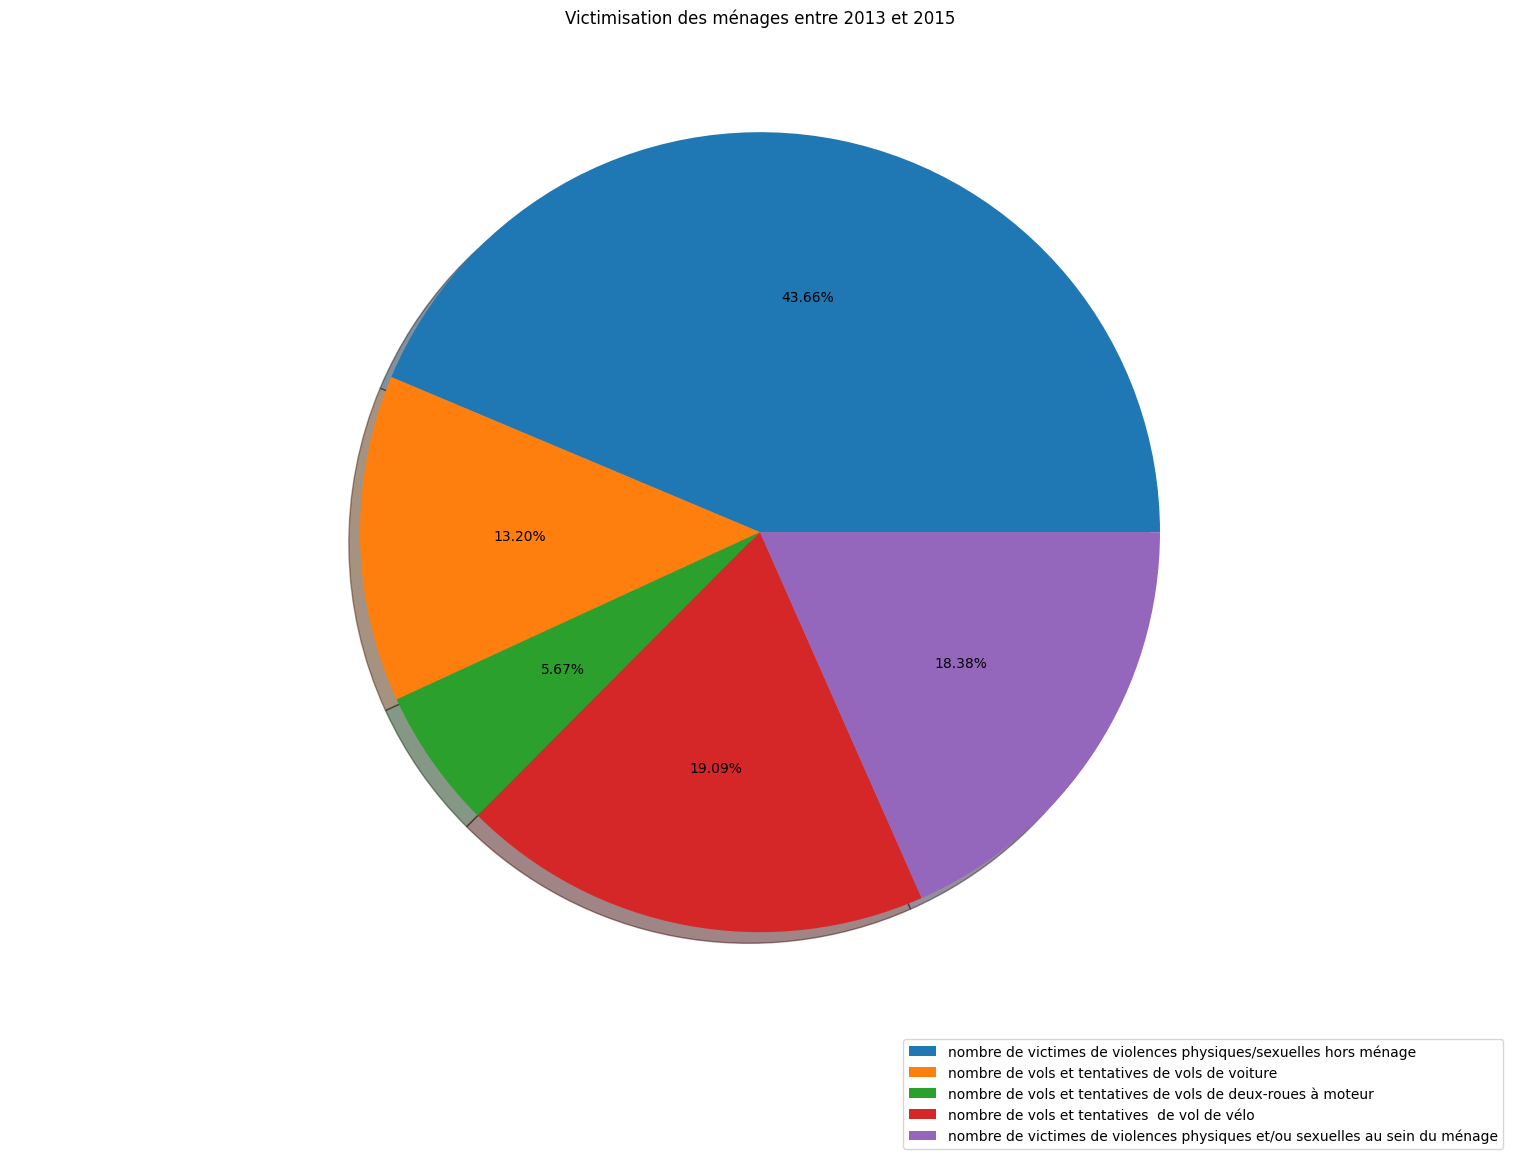

In [702]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
x = secondTiers["INDICATEURS/PERIODE"]
y= secondTiers["Total"]
ax.pie(y,shadow=True, autopct='%1.2f%%')
plt.legend(x ,bbox_to_anchor=(1,0))
plt.title("Victimisation des ménages entre 2013 et 2015")
plt.show()

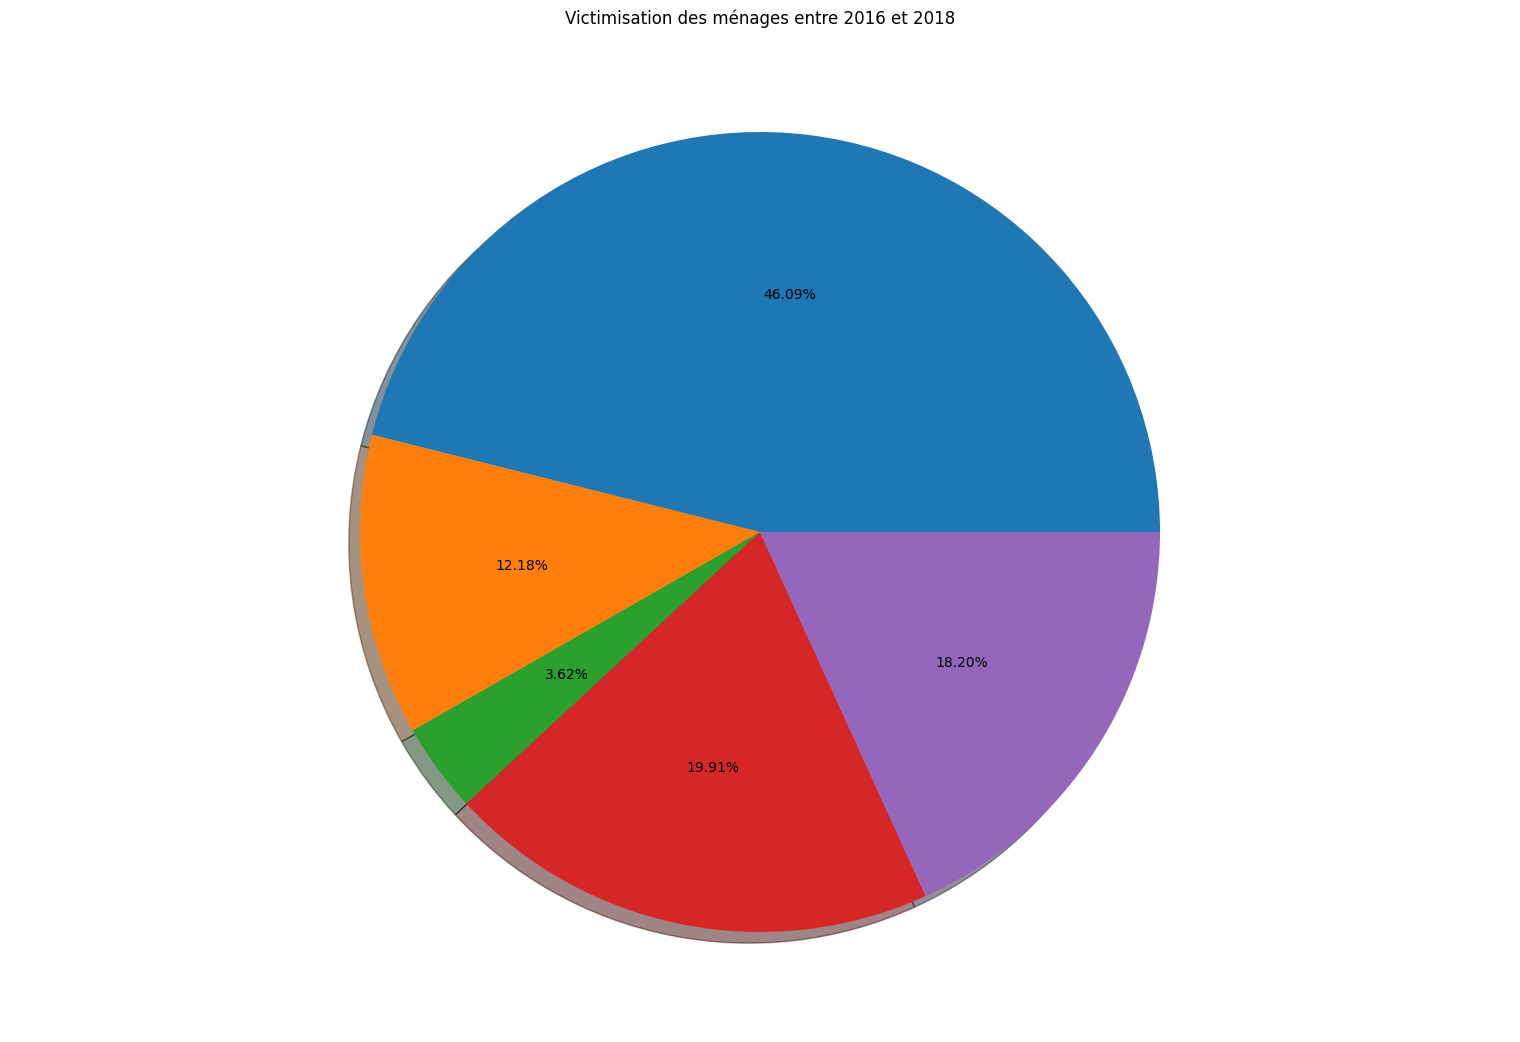

In [703]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
x = lastTiers["INDICATEURS/PERIODE"]
y= lastTiers["Total"]
ax.pie(y,shadow=True, autopct='%1.2f%%')
plt.title("Victimisation des ménages entre 2016 et 2018")
plt.show()